In [1]:
from fastai.vision import *
import pandas as pd

In [2]:
import os
#os.listdir("../data/")

In [12]:
bs = 64

In [4]:
train =Path('../data/')

In [5]:
labels_df = pd.read_csv("../labels/train.csv")

In [15]:
labels = labels_df['Id'].tolist()



In [16]:
len(labels)

25361

In [7]:
whale_tfms = get_transforms(flip_vert=False)


In [9]:
data = (ImageItemList.from_folder(train)
        #Where to find the data? -> in planet 'train' folder
        .random_split_by_pct()
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_list(labels)
        #How to label? -> use the csv file
        .transform(whale_tfms, size=224)
        #Data augmentation? -> use tfms with a size of 128
        .databunch(bs=bs))                          
        #Finally -> use the defaults for conversion to databunch
data = data.normalize(imagenet_stats)

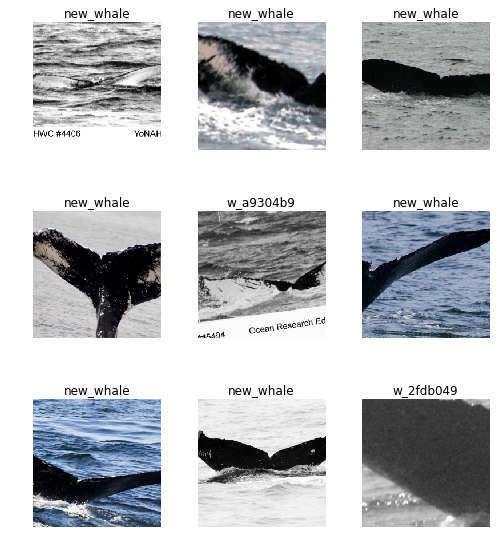

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds),len(data.classes)

(['new_whale',
  'w_0003639',
  'w_0003c59',
  'w_0027efa',
  'w_00289b1',
  'w_002c810',
  'w_0032a46',
  'w_003bae6',
  'w_00656c0',
  'w_0066399',
  'w_007fefa',
  'w_00904a7',
  'w_009c9c5',
  'w_00a41ba',
  'w_00b3dc2',
  'w_00d50c9',
  'w_00d5466',
  'w_00d5e98',
  'w_00f340d',
  'w_010f858',
  'w_0115c24',
  'w_0118bab',
  'w_012678c',
  'w_0135f5f',
  'w_0140c92',
  'w_015a4bf',
  'w_016f0ea',
  'w_0182687',
  'w_0189b6d',
  'w_01976db',
  'w_01a1d88',
  'w_01cb0c4',
  'w_01cbbbd',
  'w_01d790e',
  'w_01e1b97',
  'w_01e1fe0',
  'w_01ed442',
  'w_01f14e1',
  'w_01fc429',
  'w_02156b0',
  'w_022b708',
  'w_022d2f5',
  'w_02469a1',
  'w_02545ea',
  'w_025911c',
  'w_0277a07',
  'w_027f528',
  'w_0292e15',
  'w_02aa597',
  'w_02c7e9d',
  'w_02d138d',
  'w_02d5c46',
  'w_02e8199',
  'w_02ff6d6',
  'w_0301302',
  'w_030ac9b',
  'w_030c8b0',
  'w_030e2cf',
  'w_03193e5',
  'w_031e1a3',
  'w_0323574',
  'w_03270e3',
  'w_0350bf4',
  'w_03670aa',
  'w_0369a5c',
  'w_036bc54',
  'w_036db

In [10]:
learn = create_cnn(data, models.resnet101, metrics=error_rate)

In [11]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,6.272147,5.722090,0.610607


In [9]:
learn.save('stage-1')

In [10]:
learn.unfreeze()

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


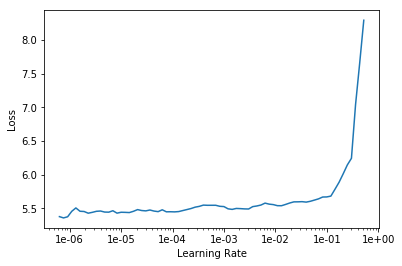

In [12]:
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,5.528848,5.680730,0.610607
2,5.477745,5.671085,0.610607


In [22]:
learn.save('stage-2')

In [23]:
learn.load('stage-2');

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

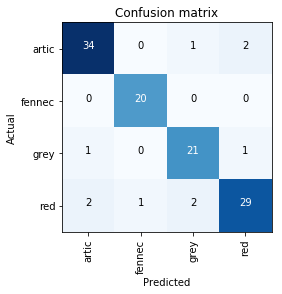

In [25]:
interp.plot_confusion_matrix()

In [26]:
from fastai.widgets import *

In [18]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

NameError: name 'DatasetFormatter' is not defined

In [28]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [30]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [31]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [59]:
#production mode


In [60]:
learn.export()

In [61]:
defaults.device = torch.device('cpu')

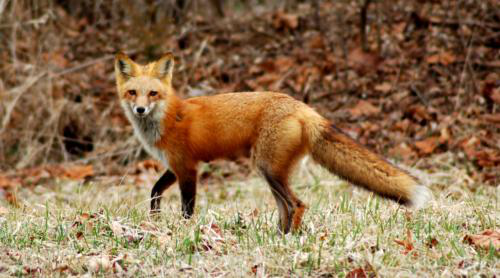

In [65]:
img = open_image(path/'red'/'00000020.jpg')
img

In [66]:
learn = load_learner(path)

In [67]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category red